# %Lý do chọn phương pháp sử dụng OpenCV: do OpenCV dễ sử dụng, hỗ trợ sẵn các thư viện cần thiết cho việc nhận dạng khuôn mặt.

# Cài đặt các thư viện cần thiết để chạy openCV

import os
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import cv2

plt.rcParams["figure.figsize"] = (18, 12)

In [14]:
#% các hàm lamba hỗ trợ tìm kiếm các file có đuôi mở rộng ext vs tìm các thư mục con
scan_images = lambda dir_name, ext='.jpg': [ img for img in os.listdir(dir_name) if img.endswith(ext) ]
scan_subdirs = lambda dir_name: [ dir_sub for dir_sub in os.listdir(dir_name) 
                                     if os.path.isdir(os.path.join(dir_name, dir_sub)) ]

# Hàm face detection của OpenCV, trong bài này ta dùng model haarcascade_frontalface_default
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Hàm detect khuôn mặt
def detect_faces(file_path):
    # đọc ảnh lên và chuyển về mức xám, sau đó detect các khuôn mặt trong ảnh
    img = cv2.imread(file_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.15, minNeighbors=15)
    return_faces = []
    
    # lưu các khuôn mặt detect được ra file tạm và vẽ khung + tên cho khuôn mặt
    for (x, y, w, h) in faces:
        fileName = "/tmp/face-"+str(faceId)+ ".jpg"
        cv2.imwrite(fileName, img[y:y+h, x:x+w])
        id, conf = recognizer.predict(gray[y:y+h, x:x+w])

        return_faces.append({
            'xyz': (x, y, w, h),
            'path': fileName,
            'faceId': id,
            'faceName': getFaceName(DBFaces, id)
        })
    return return_faces

# hàm hỗ trợ đọc nhãn cho khuôn mặt
def getFaceName(DBFaces, id):
    for face in DBFaces:
        if face['faceId'] == id:
            return face['name']
    return 'unknown'

In [16]:
# Train Model

faces_root = 'face_db'
DBFaces = []
faceId = 0

# Quét các ảnh trong các thư mục face_db 
for file in scan_subdirs(faces_root):
    print('Loading', file)
    file_path = os.path.join(faces_root, file)
    for img in scan_images(file_path):
        # load ảnh và đưa về mảng numpy
        facesImg = Image.open(os.path.join(file_path, img)).convert('L')
        faceNP = np.array(facesImg, 'uint8')
        
        DBFaces.append({
            'faceId': faceId,
            'name': file,
            'source': os.path.join(file_path, img),
            'faceNP': faceNP
        })
        faceId +=1
        
# Train
faces = []
Ids = []
for row in DBFaces:
    faces.append(row['faceNP'])
    Ids.append(row['faceId'])
    
recognizer = cv2.face.LBPHFaceRecognizer_create()
# bắt đầu train các faces load được ở bước trên (lưu trong biến DBFaces và chuẩn hóa về đúng format qua faces)
recognizer.train(faces, np.array(Ids))
# lưu lại kết quả sau khi train
recognizer.save("face_model.yml")

Loading TRUONGTX
Loading TAIHPT
Loading DUYNN
Loading TANTD
Loading THAODNT
Loading ThuyLTN
Loading MINHHA
Loading DUYETLV
Loading TANPV
Loading LOCTH
Loading VUND
Loading ANHLT
Loading NHANTH
Loading HOAINT
Loading MYNH
Loading VULQ
Loading QUANVM
Loading HUNGNV
Loading TIENBDT
Loading HOBV
Loading HOAISD
Loading CUONGNT
Loading TULG
Loading HANTQ


detected_face [{'xyz': (2694, 977, 230, 230), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (2365, 1368, 358, 358), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (295, 1261, 260, 260), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (1277, 1184, 183, 183), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (1451, 1641, 339, 339), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}]


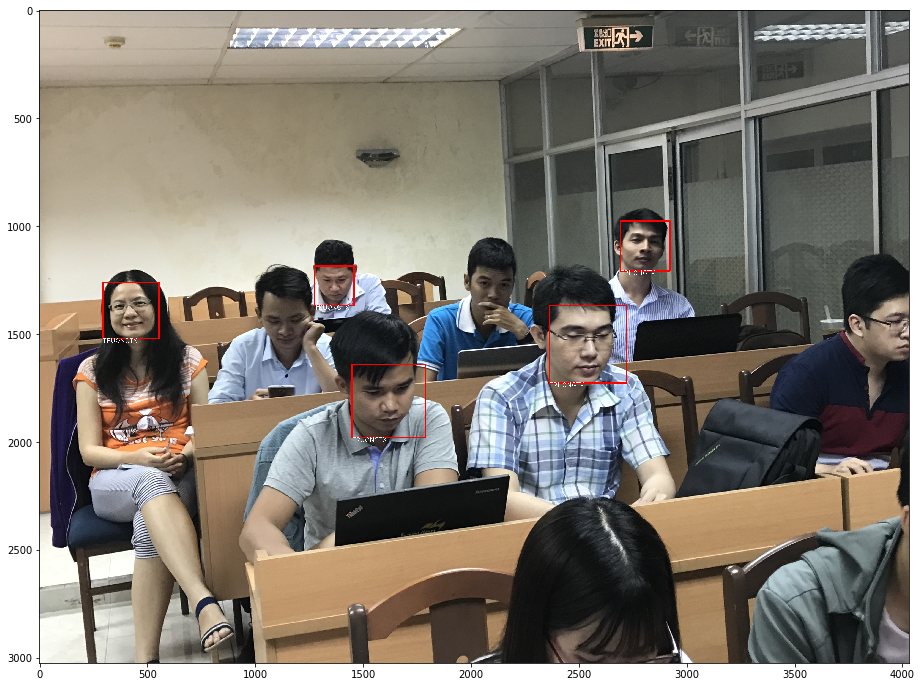

detected_face [{'xyz': (2921, 540, 206, 206), 'path': '/tmp/face-47.jpg', 'faceId': 6, 'faceName': 'TANTD'}, {'xyz': (2224, 697, 228, 228), 'path': '/tmp/face-47.jpg', 'faceId': 10, 'faceName': 'MINHHA'}, {'xyz': (1566, 720, 242, 242), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (3697, 786, 225, 225), 'path': '/tmp/face-47.jpg', 'faceId': 27, 'faceName': 'VULQ'}, {'xyz': (1274, 906, 321, 321), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (99, 908, 305, 305), 'path': '/tmp/face-47.jpg', 'faceId': 6, 'faceName': 'TANTD'}, {'xyz': (605, 1714, 445, 445), 'path': '/tmp/face-47.jpg', 'faceId': 5, 'faceName': 'TANTD'}]


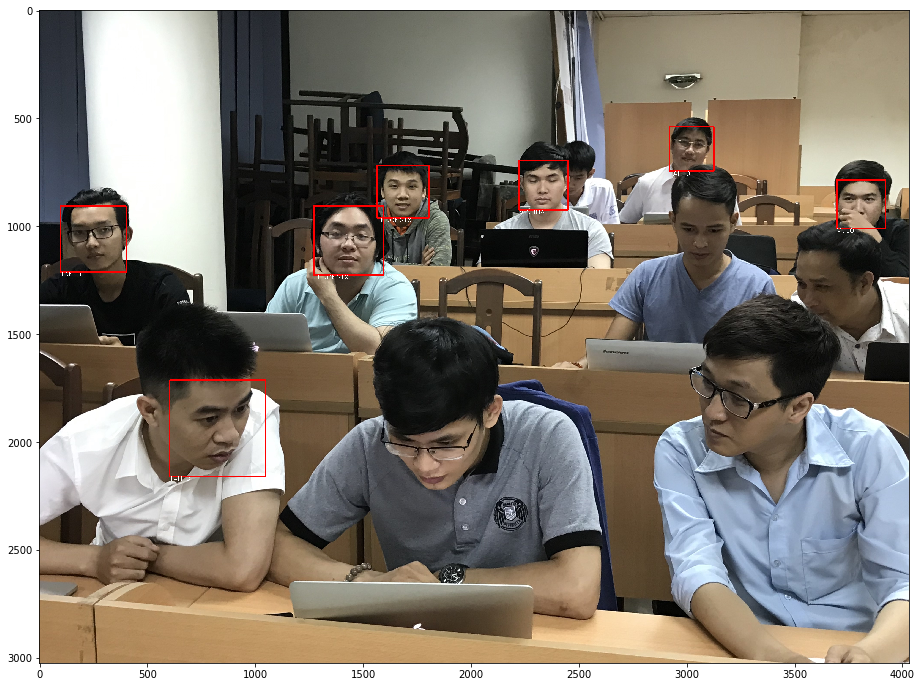

detected_face [{'xyz': (3626, 822, 148, 148), 'path': '/tmp/face-47.jpg', 'faceId': 11, 'faceName': 'MINHHA'}, {'xyz': (3198, 845, 135, 135), 'path': '/tmp/face-47.jpg', 'faceId': 11, 'faceName': 'MINHHA'}, {'xyz': (3042, 898, 172, 172), 'path': '/tmp/face-47.jpg', 'faceId': 22, 'faceName': 'NHANTH'}, {'xyz': (2472, 909, 143, 143), 'path': '/tmp/face-47.jpg', 'faceId': 14, 'faceName': 'DUYETLV'}, {'xyz': (1725, 1025, 153, 153), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (492, 1248, 268, 268), 'path': '/tmp/face-47.jpg', 'faceId': 8, 'faceName': 'THAODNT'}, {'xyz': (3407, 1129, 176, 176), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (1330, 1283, 288, 288), 'path': '/tmp/face-47.jpg', 'faceId': 22, 'faceName': 'NHANTH'}, {'xyz': (2619, 1168, 154, 154), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (2740, 1347, 293, 293), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}]


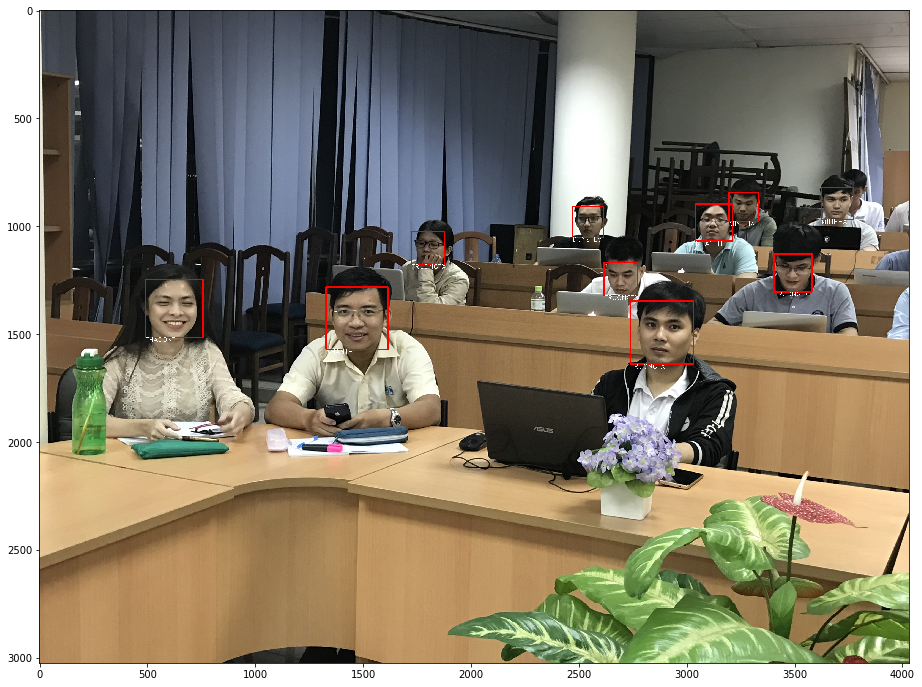

detected_face [{'xyz': (2490, 954, 267, 267), 'path': '/tmp/face-47.jpg', 'faceId': 44, 'faceName': 'TULG'}, {'xyz': (1825, 949, 221, 221), 'path': '/tmp/face-47.jpg', 'faceId': 41, 'faceName': 'TULG'}, {'xyz': (1193, 1251, 301, 301), 'path': '/tmp/face-47.jpg', 'faceId': 9, 'faceName': 'MINHHA'}, {'xyz': (219, 1280, 328, 328), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (3349, 1575, 376, 376), 'path': '/tmp/face-47.jpg', 'faceId': 24, 'faceName': 'VULQ'}]


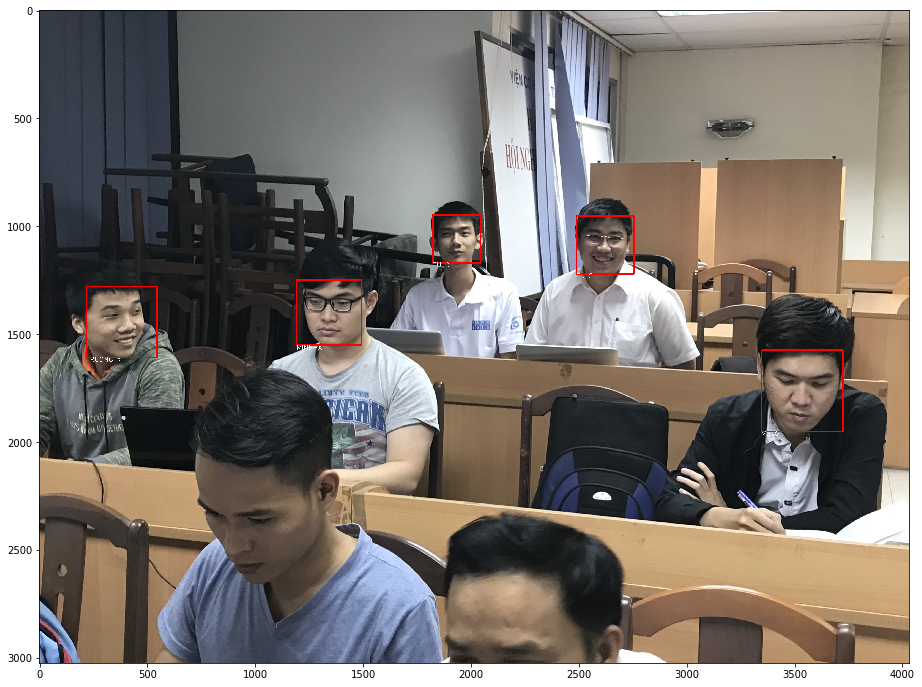

detected_face [{'xyz': (1785, 870, 103, 103), 'path': '/tmp/face-47.jpg', 'faceId': 41, 'faceName': 'TULG'}, {'xyz': (763, 922, 111, 111), 'path': '/tmp/face-47.jpg', 'faceId': 22, 'faceName': 'NHANTH'}, {'xyz': (1429, 908, 110, 110), 'path': '/tmp/face-47.jpg', 'faceId': 41, 'faceName': 'TULG'}, {'xyz': (1132, 865, 94, 94), 'path': '/tmp/face-47.jpg', 'faceId': 22, 'faceName': 'NHANTH'}, {'xyz': (1592, 964, 116, 116), 'path': '/tmp/face-47.jpg', 'faceId': 22, 'faceName': 'NHANTH'}, {'xyz': (145, 1011, 140, 140), 'path': '/tmp/face-47.jpg', 'faceId': 26, 'faceName': 'VULQ'}, {'xyz': (1242, 1015, 120, 120), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (1560, 1092, 176, 176), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (722, 1486, 331, 331), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (2614, 1299, 201, 201), 'path': '/tmp/face-47.jpg', 'faceId': 23, 'faceName': 'MYNH'}, {'xyz': (2064, 1205, 160, 160)

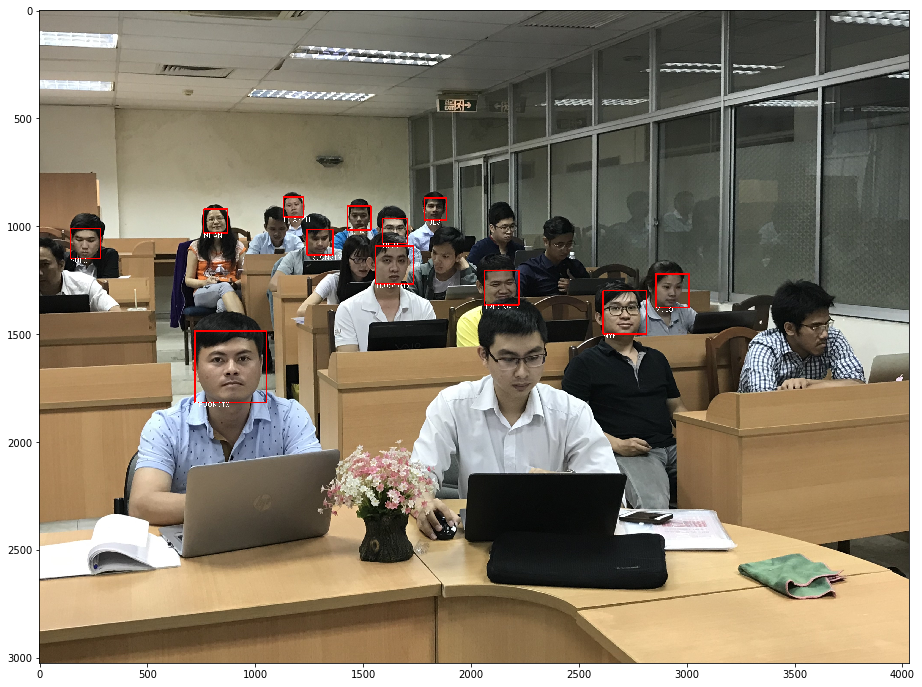

detected_face [{'xyz': (2103, 614, 191, 191), 'path': '/tmp/face-47.jpg', 'faceId': 44, 'faceName': 'TULG'}, {'xyz': (1378, 735, 230, 230), 'path': '/tmp/face-47.jpg', 'faceId': 11, 'faceName': 'MINHHA'}, {'xyz': (691, 760, 244, 244), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (3595, 714, 176, 176), 'path': '/tmp/face-47.jpg', 'faceId': 22, 'faceName': 'NHANTH'}, {'xyz': (200, 941, 343, 343), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (2870, 871, 238, 238), 'path': '/tmp/face-47.jpg', 'faceId': 25, 'faceName': 'VULQ'}, {'xyz': (2048, 1435, 538, 538), 'path': '/tmp/face-47.jpg', 'faceId': 6, 'faceName': 'TANTD'}]


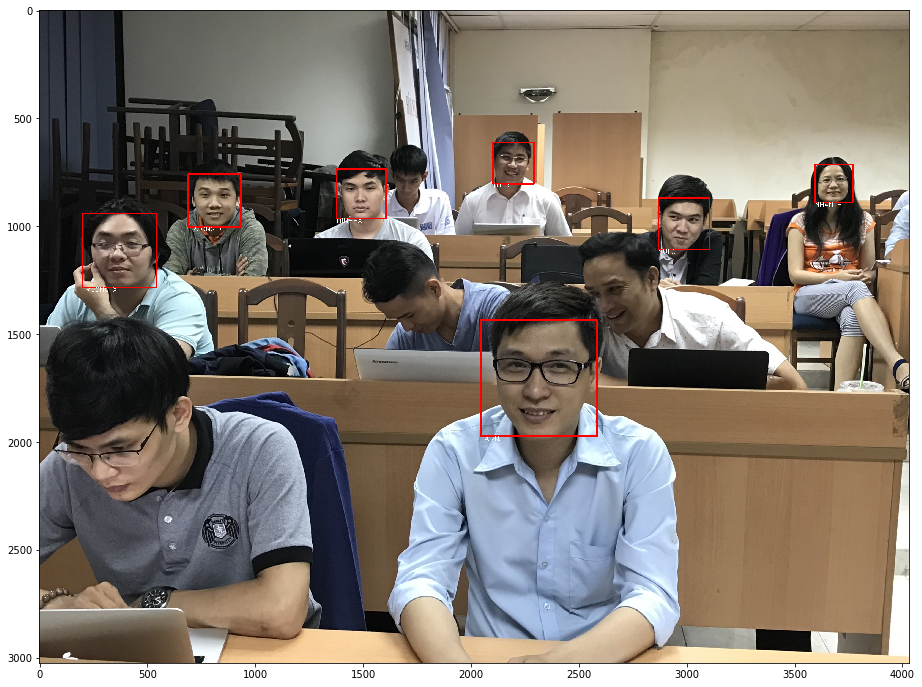

detected_face [{'xyz': (2453, 991, 154, 154), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (1709, 1006, 130, 130), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (1258, 1140, 194, 194), 'path': '/tmp/face-47.jpg', 'faceId': 11, 'faceName': 'MINHHA'}, {'xyz': (1838, 1104, 221, 221), 'path': '/tmp/face-47.jpg', 'faceId': 22, 'faceName': 'NHANTH'}, {'xyz': (990, 1037, 151, 151), 'path': '/tmp/face-47.jpg', 'faceId': 22, 'faceName': 'NHANTH'}, {'xyz': (251, 1497, 436, 436), 'path': '/tmp/face-47.jpg', 'faceId': 6, 'faceName': 'TANTD'}, {'xyz': (1596, 1791, 392, 392), 'path': '/tmp/face-47.jpg', 'faceId': 0, 'faceName': 'TRUONGTX'}, {'xyz': (3577, 1932, 371, 371), 'path': '/tmp/face-47.jpg', 'faceId': 6, 'faceName': 'TANTD'}]


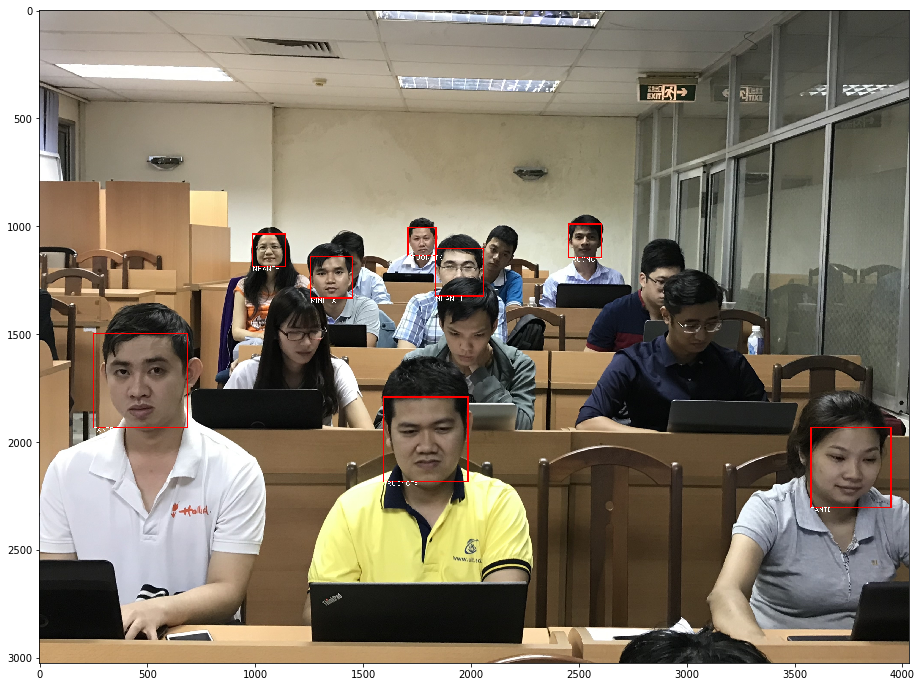

In [22]:
#Test các ảnh đặt trong thư mục test và hiển thị kết quả với các face detect được kèm nhãn
TEST_DIR = 'test'
font = cv2.FONT_HERSHEY_DUPLEX

def predict(image_path):
    detected_face = detect_faces(image_path)
    print('detected_face', detected_face)
    current_img = cv2.imread(image_path)
    current_img = cv2.cvtColor(current_img, cv2.COLOR_BGR2RGB) 
    
    for face in detected_face:
        x, y, w, h = face['xyz']
        cv2.rectangle(current_img, (x, y), (x+w, y+h), (255, 0, 0), 5)
        cv2.putText(current_img, face['faceName'], (x, y + h + 20), font, 1, (255, 255, 255), 1)
        
    plt.imshow(current_img)
    plt.show()
    
for test_file in scan_images(TEST_DIR, ext='.jpg'):
    test_file_path = os.path.join(TEST_DIR, test_file)
    predict(test_file_path)